# Sarah's Poisonous Mushroom Data Set

**Author:** Sarah Howard 

**Date:** April 6. 2025

**Objective:** Training a classification model to determine which mushrooms are poisonous or edible.

## Introduction

Using the UCI Mushroom Dataset, I will be training a model to predict if a mushroom is poisonous or edible.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Section 1. Import and Inspect the Data

### Load the UCI Mushroom dataset and confirm it’s structured correctly

In [83]:
# Load the UCI mushroom dataset from Projects Midterm Data folder
df = pd.read_csv(r"C:\Projects\applied-ml-showard\midterm\Data\agaricus-lepiota.data", delimiter=",", header=None)

# Display the first 10 rows
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [84]:
# Define the headers as a list
headers = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
    ]

# Assign the headers to the DataFrame
df.columns = headers
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1             

In [85]:
#Clean the data
df.drop(axis='columns', labels='stalk-root', inplace=True)
df.dropna(axis='index', how="any", inplace=True)
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-surface-above-ring  \
0            c         n          k           e                        s   
1            c         b          k           e                        s   
2            c         b          n           e                        s   
3            c         n          n           e                        s   
4            w         b          k           t                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0         

### Encode the dataset from categorical to numerical

In [86]:
# Columns you want to encode
columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'ring-number']

# Dictionary to store LabelEncoders
label_encoders = {}

# Encode each column and store the encoder
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later use

In [87]:
# See what each encoded number means

for col in label_encoders:
    classes = label_encoders[col].classes_
    mapping_df = pd.DataFrame({
        'Category': classes,
        'Encoded Value': range(len(classes))
    })
    print(f"\nColumn: {col}")
    print(mapping_df)




Column: poisonous
  Category  Encoded Value
0        e              0
1        p              1

Column: cap-shape
  Category  Encoded Value
0        b              0
1        c              1
2        f              2
3        k              3
4        s              4
5        x              5

Column: cap-surface
  Category  Encoded Value
0        f              0
1        g              1
2        s              2
3        y              3

Column: cap-color
  Category  Encoded Value
0        b              0
1        c              1
2        e              2
3        g              3
4        n              4
5        p              5
6        r              6
7        u              7
8        w              8
9        y              9

Column: ring-number
  Category  Encoded Value
0        n              0
1        o              1
2        t              2


### Describe the data

In [96]:
print(df.describe())

         poisonous    cap-shape  cap-surface    cap-color  ring-number
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000
mean      0.482029     3.348104     1.827671     4.504677     1.069424
std       0.499708     1.604329     1.229873     2.545821     0.271064
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     2.000000     0.000000     3.000000     1.000000
50%       0.000000     3.000000     2.000000     4.000000     1.000000
75%       1.000000     5.000000     3.000000     8.000000     1.000000
max       1.000000     5.000000     3.000000     9.000000     2.000000


### Display summary statistics

In [99]:
numeric_df = df[['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'ring-number']]
print(numeric_df.corr())

             poisonous  cap-shape  cap-surface  cap-color  ring-number
poisonous     1.000000   0.052951     0.178446  -0.031384    -0.214366
cap-shape     0.052951   1.000000    -0.050454  -0.048203    -0.106534
cap-surface   0.178446  -0.050454     1.000000  -0.019402    -0.026147
cap-color    -0.031384  -0.048203    -0.019402   1.000000    -0.005822
ring-number  -0.214366  -0.106534    -0.026147  -0.005822     1.000000


## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

array([[<Axes: xlabel='poisonous', ylabel='poisonous'>,
        <Axes: xlabel='cap-shape', ylabel='poisonous'>,
        <Axes: xlabel='cap-surface', ylabel='poisonous'>,
        <Axes: xlabel='cap-color', ylabel='poisonous'>,
        <Axes: xlabel='ring-number', ylabel='poisonous'>],
       [<Axes: xlabel='poisonous', ylabel='cap-shape'>,
        <Axes: xlabel='cap-shape', ylabel='cap-shape'>,
        <Axes: xlabel='cap-surface', ylabel='cap-shape'>,
        <Axes: xlabel='cap-color', ylabel='cap-shape'>,
        <Axes: xlabel='ring-number', ylabel='cap-shape'>],
       [<Axes: xlabel='poisonous', ylabel='cap-surface'>,
        <Axes: xlabel='cap-shape', ylabel='cap-surface'>,
        <Axes: xlabel='cap-surface', ylabel='cap-surface'>,
        <Axes: xlabel='cap-color', ylabel='cap-surface'>,
        <Axes: xlabel='ring-number', ylabel='cap-surface'>],
       [<Axes: xlabel='poisonous', ylabel='cap-color'>,
        <Axes: xlabel='cap-shape', ylabel='cap-color'>,
        <Axes: xlabel='

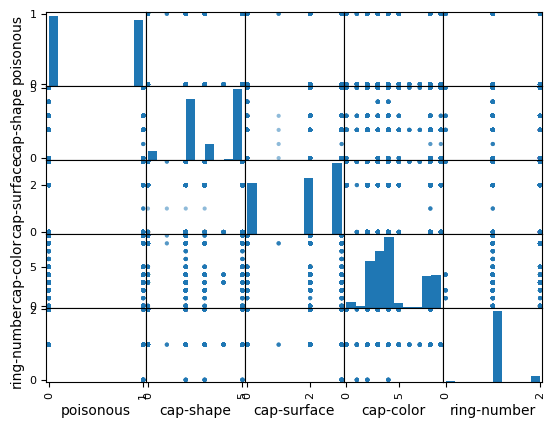

In [102]:
# Use a scatter matrix to visualize feature relationships and distributions:
attributes = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'ring-number']
scatter_matrix(df[attributes])

In [88]:
# Split the data into a training set and a test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

6499 1625


In [90]:
reg = LinearRegression()

X = train_set[['cap-shape', 'cap-surface', 'cap-color', 'ring-number']]
y = train_set["poisonous"]

reg.fit(X, y)

LinearRegression()

In [92]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))

# Check the performance on the test set
X_test = test_set[['cap-shape', 'cap-surface', 'cap-color', 'ring-number']]
y_test = test_set["poisonous"]
print("The score for the test set is", reg.score(X_test,y_test))

The bias is  0.7602535635693413
The feature coefficients are  [ 0.01112483  0.071529   -0.00570318 -0.39025225]
The score for the training set is 0.07928311023009726
The score for the test set is 0.07244358693375053
